# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [2]:
df=pd.read_csv('agriculture_csv')
df.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


# EDA

In [3]:
#checking the shape of data
df.shape

(88858, 10)

In [4]:
#checking the types of data
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [5]:
#checking the columns
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [6]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [7]:
#checking the null values in the dataset
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

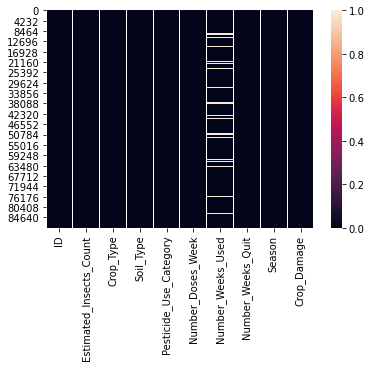

In [8]:
#using heatmap for better representation of null values
sns.heatmap(df.isnull())

In [9]:
#filling the null values
df=df.replace(np.NaN,df['Number_Weeks_Used'].mean())


In [10]:
#describing the data
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.747567,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.623970,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


# Correlation

In [11]:
dfcor=df.corr()
dfcor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.412904,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.041679,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.066420,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.326233,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.119778,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.412904,-0.041679,-0.066420,0.326233,0.119778,1.000000,-0.425763,0.004188,0.219621
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.425763,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004188,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.219621,-0.133117,-0.000184,1.000000


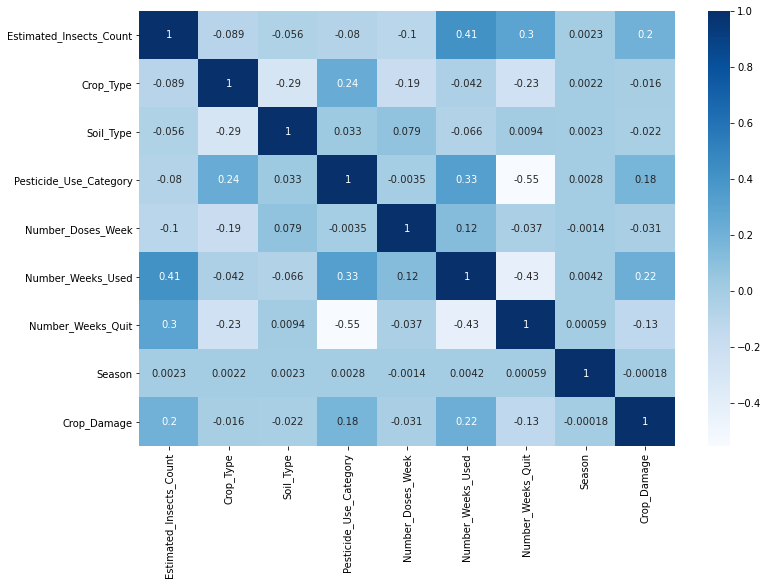

In [12]:
#using heeatmap for bettter representation of the correaltiion
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='Blues',annot=True)

# Visualizations

In [13]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [14]:
#dropping column with id 
df.drop(columns=['ID'],axis=1, inplace=True)

# biivarate analysis with target variable Crop Damage

1212    3438
1132    3370
1478    3358
1385    3309
1056    3235
        ... 
3896     134
3515     123
4097     113
231       89
169       63
Name: Estimated_Insects_Count, Length: 71, dtype: int64

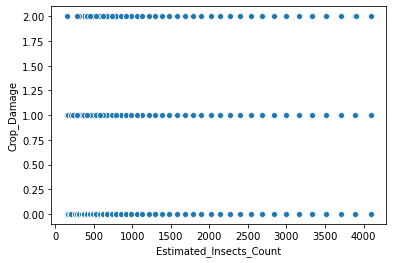

In [15]:
sns.scatterplot(x='Estimated_Insects_Count',y='Crop_Damage',data=df)

df['Estimated_Insects_Count'].value_counts()

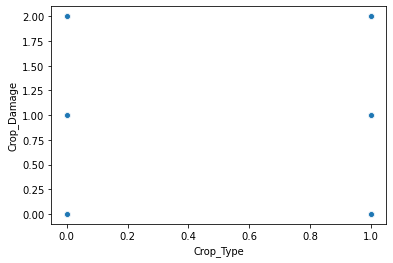

In [16]:
sns.scatterplot(x='Crop_Type',y='Crop_Damage',data=df)



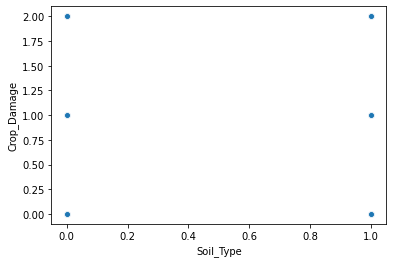

In [17]:
sns.scatterplot(x='Soil_Type',y='Crop_Damage',data=df)


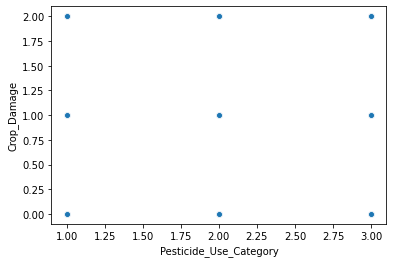

In [18]:
sns.scatterplot(x='Pesticide_Use_Category',y='Crop_Damage',data=df)



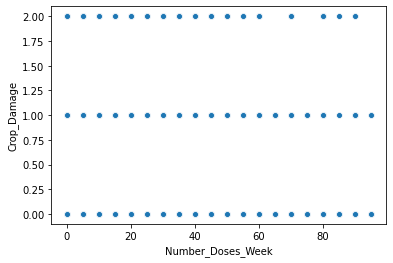

In [19]:
sns.scatterplot(x='Number_Doses_Week',y='Crop_Damage',data=df)



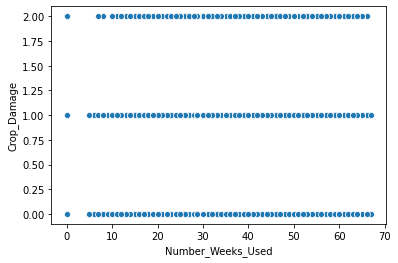

In [20]:
sns.scatterplot(x='Number_Weeks_Used',y='Crop_Damage',data=df)



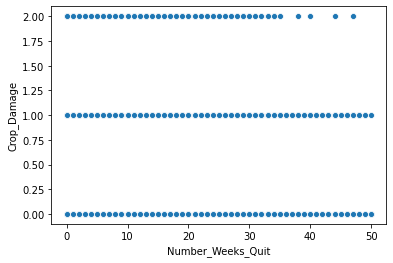

In [21]:
sns.scatterplot(x='Number_Weeks_Quit',y='Crop_Damage',data=df)



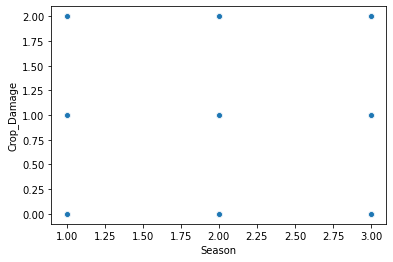

In [22]:
sns.scatterplot(x='Season',y='Crop_Damage',data=df)



In [23]:
df.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

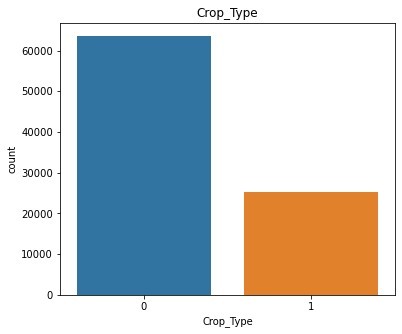

0    63589
1    25269
Name: Crop_Type, dtype: int64

In [24]:
#univaraite analysis
plt.subplots(figsize=(6,5))
sns.countplot(x='Crop_Type', data=df)
plt.title('Crop_Type')
plt.show()
df['Crop_Type'].value_counts()

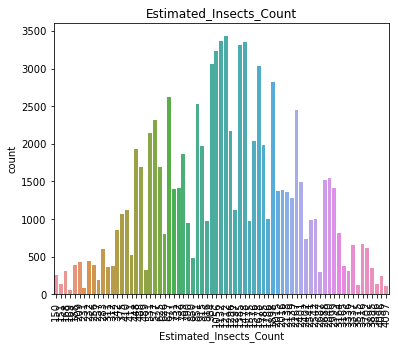

1212    3438
1132    3370
1478    3358
1385    3309
1056    3235
        ... 
3896     134
3515     123
4097     113
231       89
169       63
Name: Estimated_Insects_Count, Length: 71, dtype: int64

In [25]:
plt.subplots(figsize=(6,5))
sns.countplot(x='Estimated_Insects_Count', data=df)
plt.title('Estimated_Insects_Count')
plt.xticks(rotation='vertical')
plt.show()
df['Estimated_Insects_Count'].value_counts()

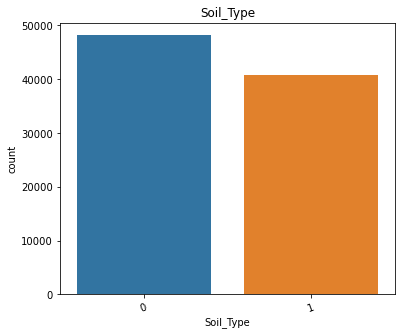

0    48124
1    40734
Name: Soil_Type, dtype: int64

In [26]:
plt.subplots(figsize=(6,5))
sns.countplot(x='Soil_Type', data=df)
plt.title('Soil_Type')
plt.xticks(rotation=20)
plt.show()
df['Soil_Type'].value_counts()

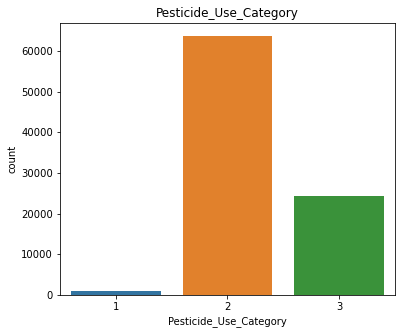

2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64

In [27]:
plt.subplots(figsize=(6,5))
sns.countplot(x='Pesticide_Use_Category', data=df)
plt.title('Pesticide_Use_Category')
plt.show()
df['Pesticide_Use_Category'].value_counts()

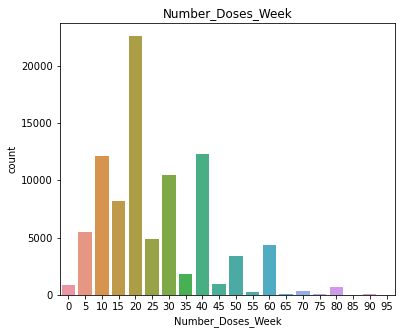

20    22589
40    12298
10    12111
30    10438
15     8178
5      5520
25     4890
60     4367
50     3361
35     1832
45      936
0       837
80      672
70      303
55      277
90       83
65       64
75       61
95       30
85       11
Name: Number_Doses_Week, dtype: int64

In [28]:
plt.subplots(figsize=(6,5))
sns.countplot(x='Number_Doses_Week', data=df)
plt.title('Number_Doses_Week')
plt.show()
df['Number_Doses_Week'].value_counts()

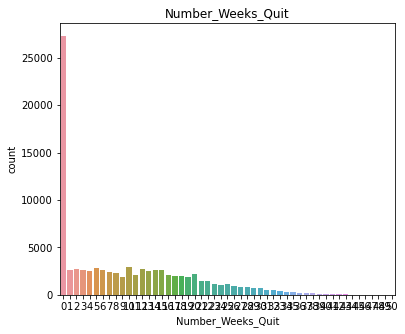

0     27274
10     2893
5      2831
2      2743
12     2701
15     2668
1      2620
14     2610
6      2584
3      2578
4      2528
13     2485
7      2418
8      2294
20     2209
16     2108
11     2090
18     2030
17     2018
9      1897
19     1841
21     1436
22     1414
23     1166
25     1109
24     1054
26      894
27      820
28      808
30      751
29      719
31      530
32      505
33      370
34      345
35      301
36      248
37      221
38      162
40      133
39      109
41       86
42       75
43       51
44       38
45       30
46       22
47       21
48       10
50        6
49        4
Name: Number_Weeks_Quit, dtype: int64

In [29]:
plt.subplots(figsize=(6,5))
sns.countplot(x='Number_Weeks_Quit', data=df)
plt.title('Number_Weeks_Quit')
plt.show()
df['Number_Weeks_Quit'].value_counts()

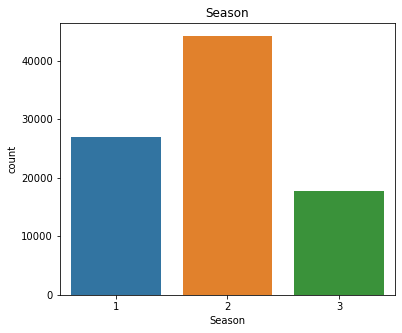

2    44210
1    26902
3    17746
Name: Season, dtype: int64

In [30]:
plt.subplots(figsize=(6,5))
sns.countplot(x='Season', data=df)
plt.title('Season')
plt.show()
df['Season'].value_counts()

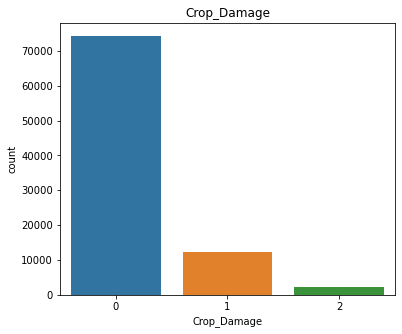

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [31]:
plt.subplots(figsize=(6,5))
sns.countplot(x='Crop_Damage', data=df)
plt.title('Crop_Damage')
plt.show()
df['Crop_Damage'].value_counts()

# checking for outliers using boxplot

In [32]:
df.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

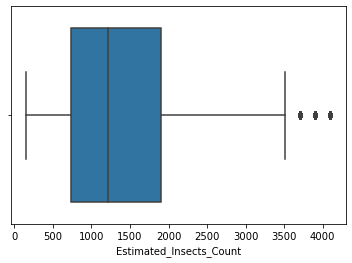

In [33]:
sns.boxplot(df['Estimated_Insects_Count'])

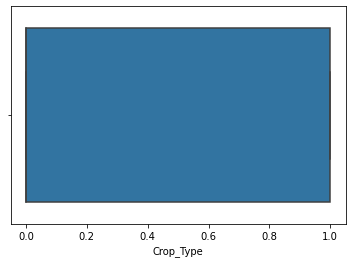

In [34]:
sns.boxplot(df['Crop_Type'])

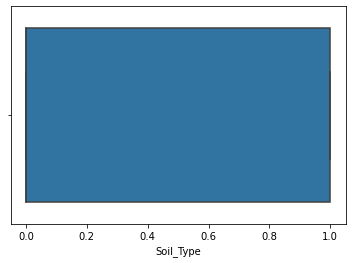

In [35]:
sns.boxplot(df['Soil_Type'])

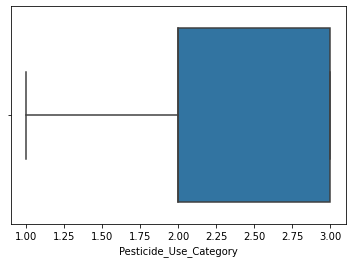

In [36]:
sns.boxplot(df['Pesticide_Use_Category'])

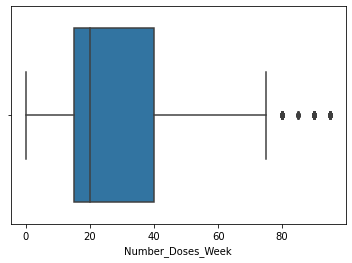

In [37]:
sns.boxplot(df['Number_Doses_Week'])

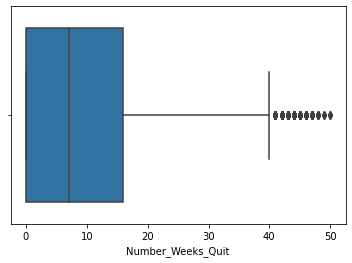

In [38]:
sns.boxplot(df['Number_Weeks_Quit'])

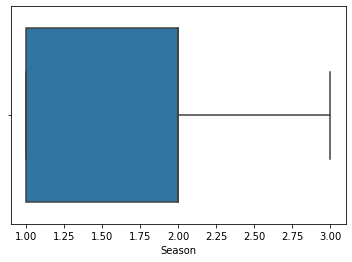

In [39]:
sns.boxplot(df['Season'])

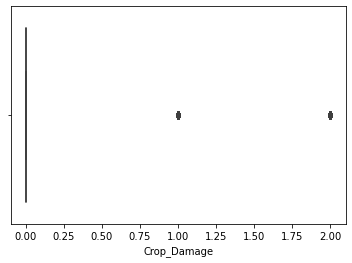

In [40]:
sns.boxplot(df['Crop_Damage'])

key observation:
    there are ouliers present in the data in the target columns crop damage,Estimated_Insects_Count,Number_Doses_Week,

# checking for skewness

In [41]:
#checking for skewness
df.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.258007
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

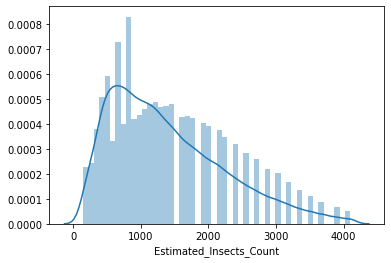

In [42]:
#plotting skewness
sns.distplot(df['Estimated_Insects_Count'])
plt.show()

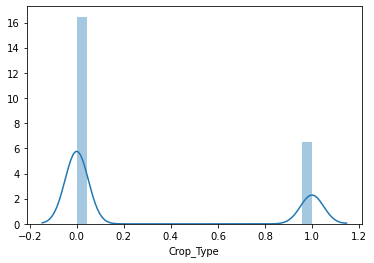

In [43]:
sns.distplot(df['Crop_Type'])
plt.show()

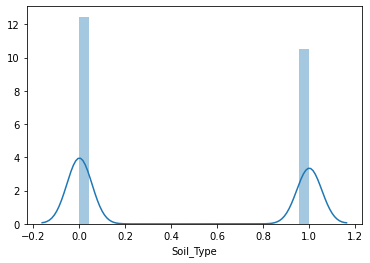

In [44]:
sns.distplot(df['Soil_Type'])
plt.show()

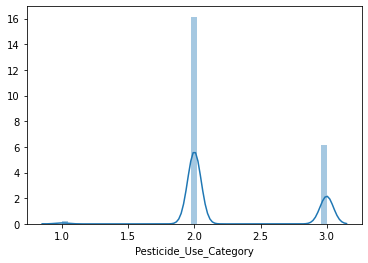

In [45]:
sns.distplot(df['Pesticide_Use_Category'])
plt.show()

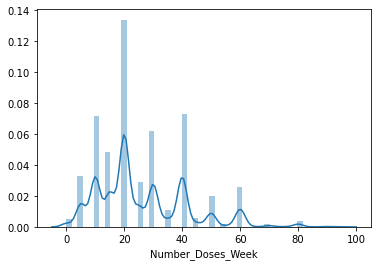

In [46]:
sns.distplot(df['Number_Doses_Week'])
plt.show()

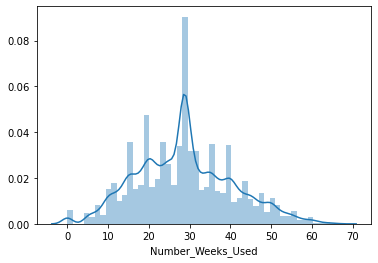

In [47]:
sns.distplot(df['Number_Weeks_Used'])
plt.show()

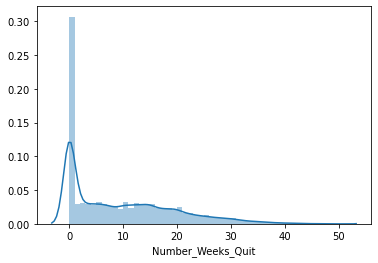

In [48]:
sns.distplot(df['Number_Weeks_Quit'])
plt.show()

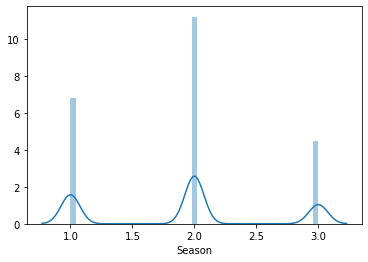

In [49]:
sns.distplot(df['Season'])
plt.show()

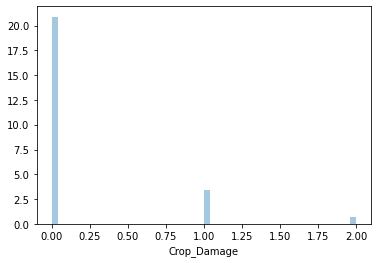

In [50]:
sns.distplot(df['Crop_Damage'])
plt.show()

# splting the data

In [51]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [52]:
df['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [53]:
#checking the shaoe of x and y
print(x.shape, '\t\t', y.shape)

(88858, 8) 		 (88858,)


In [54]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=43)

# Model building

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [56]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))


0.630024758046365
[[12831  3421  2346]
 [ 1164   936   979]
 [  197   112   229]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     18598
           1       0.21      0.30      0.25      3079
           2       0.06      0.43      0.11       538

    accuracy                           0.63     22215
   macro avg       0.39      0.47      0.38     22215
weighted avg       0.79      0.63      0.69     22215



In [57]:
#k=10
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8265586315552554
[[17749   832    17]
 [ 2452   603    24]
 [  382   146    10]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     18598
           1       0.38      0.20      0.26      3079
           2       0.20      0.02      0.03       538

    accuracy                           0.83     22215
   macro avg       0.48      0.39      0.40     22215
weighted avg       0.78      0.83      0.80     22215



In [58]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8371820841773576
[[18598     0     0]
 [ 3079     0     0]
 [  538     0     0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     18598
           1       0.00      0.00      0.00      3079
           2       0.00      0.00      0.00       538

    accuracy                           0.84     22215
   macro avg       0.28      0.33      0.30     22215
weighted avg       0.70      0.84      0.76     22215



In [59]:
#using the random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 43)
forest.fit(x_train, y_train)
forest.score(x_train, y_train)
predforest=forest.predict(x_test)
print(accuracy_score(y_test,predforest))
print(confusion_matrix(y_test,predforest))
print(classification_report(y_test,predforest))

0.8252982219221247
[[17665   807   126]
 [ 2336   638   105]
 [  340   167    31]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18598
           1       0.40      0.21      0.27      3079
           2       0.12      0.06      0.08       538

    accuracy                           0.83     22215
   macro avg       0.46      0.40      0.42     22215
weighted avg       0.78      0.83      0.80     22215



In [60]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8419536349313527
[[18376   222     0]
 [ 2751   328     0]
 [  451    87     0]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     18598
           1       0.51      0.11      0.18      3079
           2       0.00      0.00      0.00       538

    accuracy                           0.84     22215
   macro avg       0.46      0.36      0.36     22215
weighted avg       0.78      0.84      0.79     22215



In [61]:
#random forest is performing the best and we will use this model for prediction

# Saving the best model

In [63]:
import joblib

In [64]:
#saving the model as a object file

joblib.dump(forest, 'mnbfile.obj')
#load the model from the file

mnb_from_joblib=joblib.load('mnbfile.obj')

#using the loaded model to make predictions

mnb_from_joblib.predict(x_test)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)